# 1. Overview

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../csv/sold.csv')
df.head()

,BOROUGH,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Latitude,Longitude,Clean Address,Match
0,2,1667 WASHINGTON AVENUE,10457.0,3167.0,1899.0,980000,44812,40.841270,-73.901313,1667 WASHINGTON AVENUE,0
1,2,410 EAST 179TH STREET,10457.0,2048.0,1901.0,655000,44866,40.850353,-73.898824,410 EAST 179TH STREET,0
2,2,4455 PARK AVENUE,10457.0,1587.0,1899.0,520000,44860,40.853630,-73.895963,4455 PARK AVENUE,0
3,2,443 EAST 180 STREET,10457.0,2820.0,1952.0,720000,44615,40.851764,-73.896429,443 EAST 180 STREET,0
4,2,2327 WASHINGTON AVE,10458.0,1260.0,1910.0,499999,44679,40.855949,-73.892532,2327 WASHINGTON AVE,0


* SALE DATE is not in the right format. We will convert it to year-month-day.

In [3]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], unit='D', origin='1899-12-30')

In [4]:
df.head()

,BOROUGH,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Latitude,Longitude,Clean Address,Match
0,2,1667 WASHINGTON AVENUE,10457.0,3167.0,1899.0,980000,2022-09-08,40.841270,-73.901313,1667 WASHINGTON AVENUE,0
1,2,410 EAST 179TH STREET,10457.0,2048.0,1901.0,655000,2022-11-01,40.850353,-73.898824,410 EAST 179TH STREET,0
2,2,4455 PARK AVENUE,10457.0,1587.0,1899.0,520000,2022-10-26,40.853630,-73.895963,4455 PARK AVENUE,0
3,2,443 EAST 180 STREET,10457.0,2820.0,1952.0,720000,2022-02-23,40.851764,-73.896429,443 EAST 180 STREET,0
4,2,2327 WASHINGTON AVE,10458.0,1260.0,1910.0,499999,2022-04-28,40.855949,-73.892532,2327 WASHINGTON AVE,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92208 entries, 0 to 92207
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BOROUGH            92208 non-null  int64         
 1   ADDRESS            92208 non-null  object        
 2   ZIP CODE           92208 non-null  float64       
 3   GROSS SQUARE FEET  48612 non-null  float64       
 4   YEAR BUILT         86939 non-null  float64       
 5   SALE PRICE         92208 non-null  int64         
 6   SALE DATE          92208 non-null  datetime64[ns]
 7   Latitude           90981 non-null  float64       
 8   Longitude          90981 non-null  float64       
 9   Clean Address      92208 non-null  object        
 10  Match              92208 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 7.7+ MB


* BOROUGH, ADDRESS, ZIP CODE, SALE PRICE, SALE DATE, Clean Addreess and Match have no null values.
* GROSS SQUARE FEET, YEAR BUILT, Latitude and Longitude have considerable null values.

In [6]:
df['Match'].value_counts()

0    71313
1    20880
2       15
Name: Match, dtype: int64

In [7]:
df['Match'] = df['Match'].replace(2, 1)

In [8]:
df['Match'].value_counts()

0    71313
1    20895
Name: Match, dtype: int64

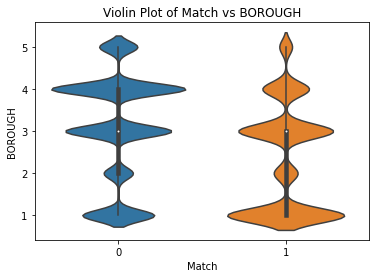

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a violin plot
sns.violinplot(x='Match', y='BOROUGH', data=df)

# Customize the plot
plt.xlabel('Match')
plt.ylabel('BOROUGH')
plt.title('Violin Plot of Match vs BOROUGH')

# Show the plot
plt.show()

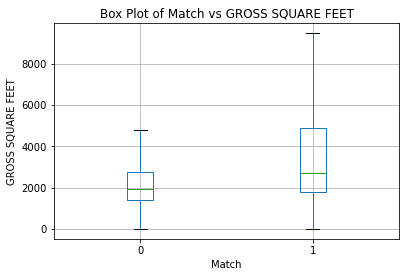

In [12]:
# Create a boxplot without the default title
ax = df.boxplot(column='GROSS SQUARE FEET', by='Match', showfliers=False, meanline=False)

# Remove the default title
ax.get_figure().suptitle('')

# Add labels
plt.xlabel('Match')
plt.ylabel('GROSS SQUARE FEET')
plt.title('Box Plot of Match vs GROSS SQUARE FEET')

# Show the plot
plt.show()

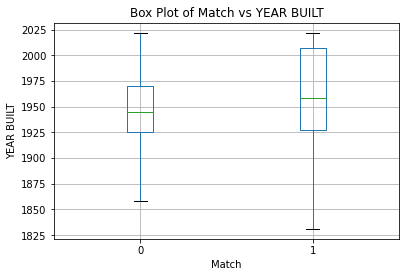

In [13]:
# Create a boxplot without the default title
ax = df.boxplot(column='YEAR BUILT', by='Match', showfliers=False, meanline=False)

# Remove the default title
ax.get_figure().suptitle('')

# Add labels
plt.xlabel('Match')
plt.ylabel('YEAR BUILT')
plt.title('Box Plot of Match vs YEAR BUILT')

# Show the plot
plt.show()

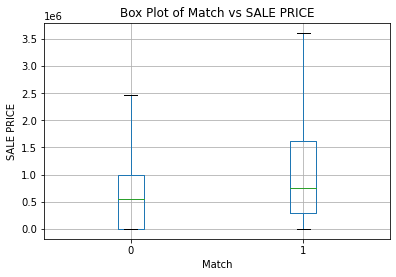

In [14]:
# Create a boxplot without the default title
ax = df.boxplot(column='SALE PRICE', by='Match', showfliers=False, meanline=False)

# Remove the default title
ax.get_figure().suptitle('')

# Add labels
plt.xlabel('Match')
plt.ylabel('SALE PRICE')
plt.title('Box Plot of Match vs SALE PRICE')

# Show the plot
plt.show()

In [17]:
df['Year'] = df['SALE DATE'].dt.year
df['Month'] = df['SALE DATE'].dt.month
df['Day'] = df['SALE DATE'].dt.day
df['Weekday'] = df['SALE DATE'].dt.weekday

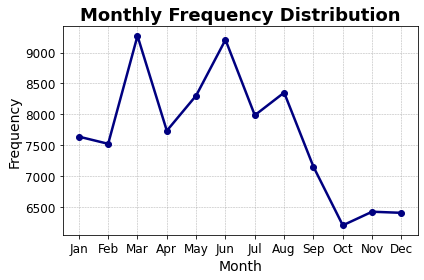

In [18]:
import matplotlib.pyplot as plt

# Calculate month frequency
month_frequency = df['Month'].value_counts().sort_index()

# Create a line chart
month_frequency.plot(kind='line', linewidth=2.5, marker='o', color='navy')

# Make the chart fancier
plt.title('Monthly Frequency Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tick_params(labelsize=12)
plt.tight_layout()

# Show the plot
plt.show()

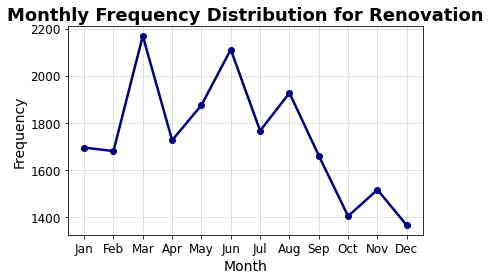

In [19]:
# Filter the DataFrame for rows where 'Match' is 1
df_match = df[df['Match'] == 1]

# Calculate month frequency for when 'Match' is 1
month_frequency = df_match['Month'].value_counts().sort_index()

# Create a line chart
month_frequency.plot(kind='line', linewidth=2.5, marker='o', color='navy')

# Make the chart fancier
plt.title('Monthly Frequency Distribution for Renovation', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# Assuming Month is a numeric value representing the month (1-12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tick_params(labelsize=12)
plt.tight_layout()

# Show the plot
plt.show()

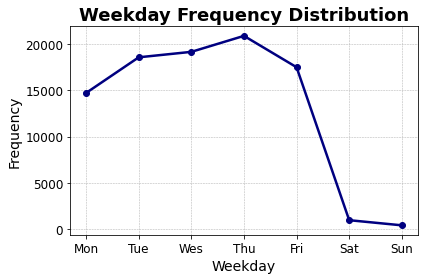

In [20]:
# Calculate month frequency
month_frequency = df['Weekday'].value_counts().sort_index()

# Create a line chart
month_frequency.plot(kind='line', linewidth=2.5, marker='o', color='navy')

# Make the chart fancier
plt.title('Weekday Frequency Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wes', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tick_params(labelsize=12)
plt.tight_layout()

# Show the plot
plt.show()

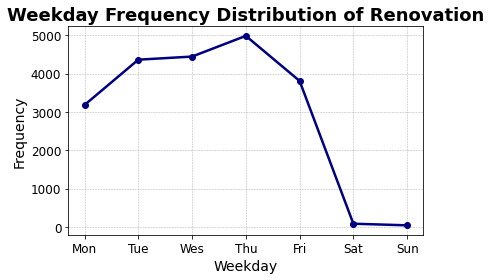

In [21]:
# Filter the DataFrame for rows where 'Match' is 1
df_match = df[df['Match'] == 1]

# Calculate month frequency
month_frequency = df_match['Weekday'].value_counts().sort_index()

# Create a line chart
month_frequency.plot(kind='line', linewidth=2.5, marker='o', color='navy')

# Make the chart fancier
plt.title('Weekday Frequency Distribution of Renovation', fontsize=18, fontweight='bold')
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wes', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tick_params(labelsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
from datetime import datetime

current_year = datetime.now().year
df['Building Age'] = current_year - df['YEAR BUILT']

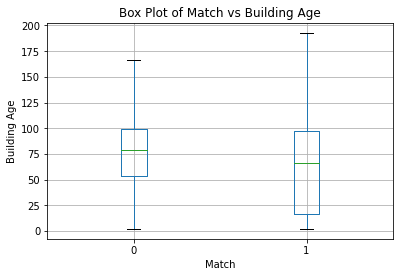

In [23]:
# Create a boxplot without the default title
ax = df.boxplot(column='Building Age', by='Match', showfliers=False, meanline=False)

# Remove the default title
ax.get_figure().suptitle('')

# Add labels
plt.xlabel('Match')
plt.ylabel('Building Age')
plt.title('Box Plot of Match vs Building Age')

# Show the plot
plt.show()

In [25]:
df['Price per Square Feet'] = (df['SALE PRICE'] / df['GROSS SQUARE FEET'])

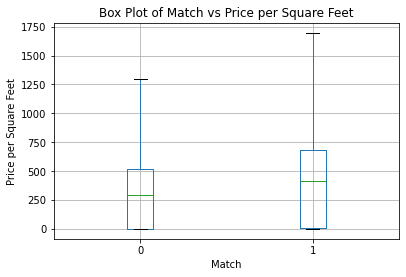

In [26]:
# Create a boxplot without the default title
ax = df.boxplot(column='Price per Square Feet', by='Match', showfliers=False, meanline=False)

# Remove the default title
ax.get_figure().suptitle('')

# Add labels
plt.xlabel('Match')
plt.ylabel('Price per Square Feet')
plt.title('Box Plot of Match vs Price per Square Feet')

# Show the plot
plt.show()

# 2. Distribution

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df.describe()

,BOROUGH,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,Latitude,Longitude,Match
count,92208.000000,92208.000000,4.861200e+04,86939.000000,9.220800e+04,90981.000000,90981.000000,92208.000000
mean,2.934648,10844.646213,5.921191e+03,1953.309079,1.671285e+06,40.709929,-73.932170,0.226770
std,1.295037,567.595769,3.806339e+04,36.879589,1.288970e+07,0.077896,0.099971,0.419133
min,1.000000,10001.000000,0.000000e+00,220.000000,0.000000e+00,40.498966,-74.254937,0.000000
25%,2.000000,10304.000000,1.406000e+03,1925.000000,0.000000e+00,40.655213,-73.985214,0.000000
50%,3.000000,11209.000000,2.000000e+03,1950.000000,5.920000e+05,40.717173,-73.948423,0.000000
75%,4.000000,11355.000000,2.888000e+03,1979.000000,1.100000e+06,40.761304,-73.858638,0.000000
max,5.000000,11697.000000,2.400000e+06,2022.000000,9.310000e+08,40.912869,-73.700913,2.000000


* GROSS SQUARE FEET, YEAR BUILT and SALE PRICE have outliers.

## 2.1 SALE DATE

In [8]:
df['Year'] = df['SALE DATE'].dt.year
df['Month'] = df['SALE DATE'].dt.month
df['Day'] = df['SALE DATE'].dt.day
df['Weekday'] = df['SALE DATE'].dt.weekday 

In [9]:
df.head()

,BOROUGH,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Latitude,Longitude,Clean Address,Match,Year,Month,Day,Weekday
0,2,1667 WASHINGTON AVENUE,10457.0,3167.0,1899.0,980000,2022-09-08,40.841270,-73.901313,1667 WASHINGTON AVENUE,0,2022,9,8,3
1,2,410 EAST 179TH STREET,10457.0,2048.0,1901.0,655000,2022-11-01,40.850353,-73.898824,410 EAST 179TH STREET,0,2022,11,1,1
2,2,4455 PARK AVENUE,10457.0,1587.0,1899.0,520000,2022-10-26,40.853630,-73.895963,4455 PARK AVENUE,0,2022,10,26,2
3,2,443 EAST 180 STREET,10457.0,2820.0,1952.0,720000,2022-02-23,40.851764,-73.896429,443 EAST 180 STREET,0,2022,2,23,2
4,2,2327 WASHINGTON AVE,10458.0,1260.0,1910.0,499999,2022-04-28,40.855949,-73.892532,2327 WASHINGTON AVE,0,2022,4,28,3


## 2.2 Add Building Age

In [10]:
from datetime import datetime

current_year = datetime.now().year
df['Building Age'] = current_year - df['YEAR BUILT']
df.head()

,BOROUGH,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Latitude,Longitude,Clean Address,Match,Year,Month,Day,Weekday,Building Age
0,2,1667 WASHINGTON AVENUE,10457.0,3167.0,1899.0,980000,2022-09-08,40.841270,-73.901313,1667 WASHINGTON AVENUE,0,2022,9,8,3,125.0
1,2,410 EAST 179TH STREET,10457.0,2048.0,1901.0,655000,2022-11-01,40.850353,-73.898824,410 EAST 179TH STREET,0,2022,11,1,1,123.0
2,2,4455 PARK AVENUE,10457.0,1587.0,1899.0,520000,2022-10-26,40.853630,-73.895963,4455 PARK AVENUE,0,2022,10,26,2,125.0
3,2,443 EAST 180 STREET,10457.0,2820.0,1952.0,720000,2022-02-23,40.851764,-73.896429,443 EAST 180 STREET,0,2022,2,23,2,72.0
4,2,2327 WASHINGTON AVE,10458.0,1260.0,1910.0,499999,2022-04-28,40.855949,-73.892532,2327 WASHINGTON AVE,0,2022,4,28,3,114.0


# 3. Correlation 

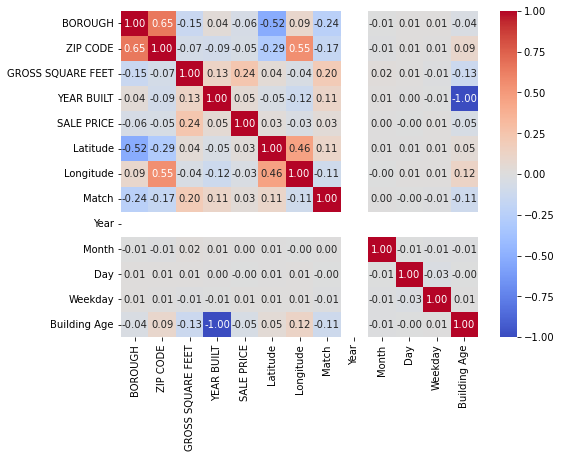

In [11]:
import seaborn as sns

plt.figure(figsize=(8, 6)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# 4. Missing Values

## 4.1 SALE PRICE

In [12]:
df['SALE PRICE'].isnull().sum()

0

In [13]:
df['SALE PRICE'].min()

0

In [14]:
df['SALE PRICE'].max()

931000000

/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


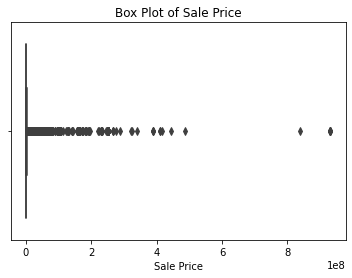

In [15]:
sns.boxplot(df['SALE PRICE'])
plt.title('Box Plot of Sale Price')
plt.xlabel('Sale Price')
plt.show()

* Consider the price smaller than 1000 and greater than 400000000 as outliers. 

In [16]:
df['SALE PRICE'].count()

92208

In [17]:
outliers = (df['SALE PRICE'] < 1000) | (df['SALE PRICE'] > 400000000)
df_no_outliers = df[~outliers]

* Impute using the median values of SALE PRICE by ZIP CODE.

In [18]:
medians_by_zip = df_no_outliers.groupby('ZIP CODE')['SALE PRICE'].median().reset_index()
medians_by_zip.columns = ['ZIP CODE', 'Median_Sale_Price']

In [19]:
df = pd.merge(df, medians_by_zip, on='ZIP CODE', how='left')

In [20]:
df.loc[outliers, 'SALE PRICE'] = df.loc[outliers, 'Median_Sale_Price']

In [21]:
df = df.drop(['Median_Sale_Price'], axis=1)

In [22]:
df['SALE PRICE'].count()

92196

## 4.2 YEAR BUILT and Building Age

In [23]:
Q1 = df['YEAR BUILT'].quantile(0.25)
Q3 = df['YEAR BUILT'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for considering values as outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

null_values = df['YEAR BUILT'].isnull()
outliers = (df['YEAR BUILT'] < lower_bound) | (df['YEAR BUILT'] > upper_bound)

most_frequent_value = df['YEAR BUILT'].mode()[0]
df.loc[null_values, 'YEAR BUILT'] = most_frequent_value
df.loc[outliers, 'YEAR BUILT'] = most_frequent_value

In [24]:
df['Building Age'] = current_year - df['YEAR BUILT']
df['Building Age'].isnull().sum()

0

## 4.3 GROSS SQUARE FEET

In [25]:
df['GROSS SQUARE FEET'].min()

0.0

In [26]:
df['GROSS SQUARE FEET'].max()

2400000.0

/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


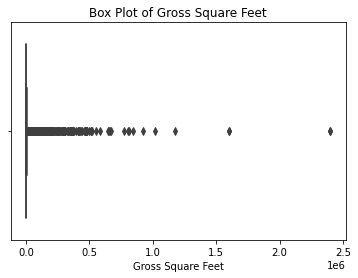

In [27]:
sns.boxplot(df['GROSS SQUARE FEET'])
plt.title('Box Plot of Gross Square Feet')
plt.xlabel('Gross Square Feet')
plt.show()

In [28]:
outliers = (df['GROSS SQUARE FEET'] < 10) | (df['GROSS SQUARE FEET'] > 1000000)
outliers.sum()

1087

In [29]:
df_no_outliers = df[~outliers]

* Try using different models and pick the one that works best.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Handling missing values in features
df_nona = df.dropna(subset=['SALE PRICE', 'BOROUGH','Building Age'])
df_nona_no_outliers = df_nona[~outliers]

# Preparing the data
X = df_nona_no_outliers[['SALE PRICE', 'BOROUGH','Building Age']]
y = df_nona_no_outliers['GROSS SQUARE FEET']

# Resetting the index of X and y
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Split the data where 'GROSS SQUARE FEET' is not null
X_train, X_test, y_train, y_test = train_test_split(X[y.notna()], y[y.notna()], test_size=0.2, random_state=42)

/var/folders/rv/bklh4q_d2157rwx2l15fwmk40000gn/T/ipykernel_91904/882628347.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_nona_no_outliers = df_nona[~outliers]


In [31]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the testing set
y_test_pred = model.predict(X_test)

# Evaluate the model
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
print('-------------------')
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 8.36e+03
train MSE: 9.56e+08
train R2: 0.109
-------------------
test MAE: 8.34e+03
test MSE: 1.01e+09
test R2: 0.101


In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_model.predict(X_train)

# Predict on the testing set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
print('-------------------')
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 1.25e+03
train MSE: 6.58e+07
train R2: 0.939
-------------------
test MAE: 2.69e+03
test MSE: 4.11e+08
test R2: 0.633


In [33]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = xgb_model.predict(X_train)

# Predict on the testing set
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
print('-------------------')
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))


train MAE: 1.81e+03
train MSE: 9.13e+07
train R2: 0.915
-------------------
test MAE: 2.88e+03
test MSE: 4.25e+08
test R2: 0.620


* Tune Random Forest.

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
              'max_depth': [3, 6, 9, 20, 50, 100], #default is None, which means infinity
              'min_samples_leaf': [1, 3, 5, 10, 20],
              'min_samples_split': [2, 3, 5, 8]                
             }

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

In [35]:
# Predict on the training set
y_train_pred = best_rf_model.predict(X_train)

# Predict on the testing set
y_test_pred = best_rf_model.predict(X_test)

# Evaluate the model
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
print('-------------------')
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 2.02e+03
train MSE: 1.78e+08
train R2: 0.834
-------------------
test MAE: 2.77e+03
test MSE: 3.76e+08
test R2: 0.664


* Finally we choose Random Forest to impute the data.

In [36]:
df['SALE PRICE'].isnull().sum()

12

In [37]:
df = df.dropna(subset=['SALE PRICE'])

In [38]:
X_missing = df[df['GROSS SQUARE FEET'].isnull()]

X_missing = X_missing[['SALE PRICE', 'BOROUGH', 'Building Age']]

In [39]:
predicted_values = best_rf_model.predict(X_missing)

# Update the DataFrame with imputed values
df.loc[df['GROSS SQUARE FEET'].isnull(), 'GROSS SQUARE FEET'] = predicted_values

In [40]:
df['GROSS SQUARE FEET'].isnull().sum()

0

In [41]:
df = df[(df['GROSS SQUARE FEET'] >= 10) & (df['GROSS SQUARE FEET'] <= 1000000)]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91109 entries, 0 to 92207
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BOROUGH            91109 non-null  int64         
 1   ADDRESS            91109 non-null  object        
 2   ZIP CODE           91109 non-null  float64       
 3   GROSS SQUARE FEET  91109 non-null  float64       
 4   YEAR BUILT         91109 non-null  float64       
 5   SALE PRICE         91109 non-null  float64       
 6   SALE DATE          91109 non-null  datetime64[ns]
 7   Latitude           89901 non-null  float64       
 8   Longitude          89901 non-null  float64       
 9   Clean Address      91109 non-null  object        
 10  Match              91109 non-null  int64         
 11  Year               91109 non-null  int64         
 12  Month              91109 non-null  int64         
 13  Day                91109 non-null  int64         
 14  Weekda

## 4.3 Latitude and Longitude

* Use ZIP CODE to impute Latitude and Longitude. Calculate the mean Latitude and Longitude for each ZIP CODE and then use these averages to fill in missing values.

In [43]:
# Calculate mean Latitude and Longitude for each ZIP code
mean_coords = df.groupby('ZIP CODE')[['Latitude', 'Longitude']].mean()

# Impute missing values
for zip_code in mean_coords.index:
    df.loc[(df['ZIP CODE'] == zip_code) & (df['Latitude'].isna()), 'Latitude'] = mean_coords.loc[zip_code, 'Latitude']
    df.loc[(df['ZIP CODE'] == zip_code) & (df['Longitude'].isna()), 'Longitude'] = mean_coords.loc[zip_code, 'Longitude']

In [44]:
df['Latitude'].isnull().sum()

1

In [45]:
df['Longitude'].isnull().sum()

1

In [46]:
df = df.dropna(subset=['Longitude','Latitude'])

# 5. Feature Engineering

## 5.1 Building Age

## 5.2 Price per Square Feet

In [47]:
df['Price per Square Feet'] = (df['SALE PRICE'] / df['GROSS SQUARE FEET']).astype(int)

In [48]:
df.head()

,BOROUGH,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Latitude,Longitude,Clean Address,Match,Year,Month,Day,Weekday,Building Age,Price per Square Feet
0,2,1667 WASHINGTON AVENUE,10457.0,3167.0,1899.0,980000.0,2022-09-08,40.841270,-73.901313,1667 WASHINGTON AVENUE,0,2022,9,8,3,125.0,309
1,2,410 EAST 179TH STREET,10457.0,2048.0,1901.0,655000.0,2022-11-01,40.850353,-73.898824,410 EAST 179TH STREET,0,2022,11,1,1,123.0,319
2,2,4455 PARK AVENUE,10457.0,1587.0,1899.0,520000.0,2022-10-26,40.853630,-73.895963,4455 PARK AVENUE,0,2022,10,26,2,125.0,327
3,2,443 EAST 180 STREET,10457.0,2820.0,1952.0,720000.0,2022-02-23,40.851764,-73.896429,443 EAST 180 STREET,0,2022,2,23,2,72.0,255
4,2,2327 WASHINGTON AVE,10458.0,1260.0,1910.0,499999.0,2022-04-28,40.855949,-73.892532,2327 WASHINGTON AVE,0,2022,4,28,3,114.0,396


## 5.4 Distance

In [49]:
from math import radians, sin, cos, sqrt, atan2

# Function to calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate the differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Calculate the distance
    distance = R * c

    return distance

# Coordinates for reference point
ref_point = (40.76469, -73.83336)

# Calculate distance and create a new 'Distance' column
df['Distance'] = df.apply(lambda row: haversine(row['Latitude'], row['Longitude'], ref_point[0], ref_point[1]), axis=1)

In [50]:
df.head()

,BOROUGH,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Latitude,Longitude,Clean Address,Match,Year,Month,Day,Weekday,Building Age,Price per Square Feet,Distance
0,2,1667 WASHINGTON AVENUE,10457.0,3167.0,1899.0,980000.0,2022-09-08,40.841270,-73.901313,1667 WASHINGTON AVENUE,0,2022,9,8,3,125.0,309,10.257899
1,2,410 EAST 179TH STREET,10457.0,2048.0,1901.0,655000.0,2022-11-01,40.850353,-73.898824,410 EAST 179TH STREET,0,2022,11,1,1,123.0,319,11.004018
2,2,4455 PARK AVENUE,10457.0,1587.0,1899.0,520000.0,2022-10-26,40.853630,-73.895963,4455 PARK AVENUE,0,2022,10,26,2,125.0,327,11.205630
3,2,443 EAST 180 STREET,10457.0,2820.0,1952.0,720000.0,2022-02-23,40.851764,-73.896429,443 EAST 180 STREET,0,2022,2,23,2,72.0,255,11.041775
4,2,2327 WASHINGTON AVE,10458.0,1260.0,1910.0,499999.0,2022-04-28,40.855949,-73.892532,2327 WASHINGTON AVE,0,2022,4,28,3,114.0,396,11.303655


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91108 entries, 0 to 92207
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   BOROUGH                91108 non-null  int64         
 1   ADDRESS                91108 non-null  object        
 2   ZIP CODE               91108 non-null  float64       
 3   GROSS SQUARE FEET      91108 non-null  float64       
 4   YEAR BUILT             91108 non-null  float64       
 5   SALE PRICE             91108 non-null  float64       
 6   SALE DATE              91108 non-null  datetime64[ns]
 7   Latitude               91108 non-null  float64       
 8   Longitude              91108 non-null  float64       
 9   Clean Address          91108 non-null  object        
 10  Match                  91108 non-null  int64         
 11  Year                   91108 non-null  int64         
 12  Month                  91108 non-null  int64         
 13  D

In [52]:
df.to_csv('../csv/clean_data.csv', index=False)